In [1]:
%matplotlib agg
import itertools
from collections import OrderedDict

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.spatial

#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('seaborn')
#plt.rc('font', size=15)
#plt.rc('axes', titlesize=15)
#plt.rc('axes', labelsize=15)
#plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize=15)
from mpl_toolkits.mplot3d import Axes3D

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import tqdm
import torch
import tables
#import torchgraphs as tg

from IPython.display import display, Markdown

aminoacids = ['-', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y']
h5_file = tables.open_file('../../data/CASP9.h5')

https://github.com/baldassarreFe/torchgraphs

In [2]:
protein = h5_file.get_node('/T0538')

sequence_len = protein.seq.shape[1]
num_models = len(protein.names)

pd.Series([field.shape for field in protein], index=[field.name for field in protein])

cb_coordinates     (289, 54, 3)
dssp              (289, 54, 14)
gdt_ts                   (289,)
gdt_ts_ha                (289,)
lddt                  (289, 54)
lddt_global              (289,)
max_sub                  (289,)
names                    (289,)
part_entr           (1, 54, 23)
rmsd                     (289,)
s_scores              (289, 54)
self_info           (1, 54, 23)
seq                 (1, 54, 22)
valid                 (289, 54)
valid_dssp            (289, 54)
dtype: object

In [3]:
print(' '.join(aminoacids[i - 1] for i in np.argmax(protein.seq[0], axis=1)))
print(' '.join('^' if v else ' ' for v in protein.valid[0]))

H M K P R S Q C Y I S I K I M G N D D Y P Q L Y I Y P G C L K Y P L Y C L B G T S N C K T C L Y P K C D E L
  ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^


In [20]:
protein.names[4]

b'Jiang_Assembly_TS4'

In [77]:
np.argmax(protein.seq[0], axis=1)

array([10, 12, 11, 16, 18, 17, 15,  3,  0,  9, 17,  9, 11,  9, 12,  7, 14,
        6,  6,  0, 16, 15, 13,  0,  9,  0, 16,  7,  3, 13, 11,  0, 16, 13,
        0,  3, 13,  4,  7, 19, 17, 14,  3, 11, 19,  3, 13,  0, 16, 11,  3,
        6,  5, 13])

In [79]:
protein.lddt[1]

array([   nan, 0.704 , 0.8045, 0.6913, 0.7702, 0.7204, 0.7737, 0.761 ,
       0.7957, 0.6993, 0.699 , 0.5868, 0.6769, 0.4828, 0.4364, 0.4194,
       0.4807, 0.564 , 0.487 , 0.5318, 0.5755, 0.6832, 0.6144, 0.6924,
       0.7074, 0.7298, 0.6369, 0.7227, 0.7303, 0.7025, 0.6718, 0.8068,
       0.6279, 0.6789, 0.7386, 0.7883, 0.6725, 0.7872, 0.7849, 0.7766,
       0.7091, 0.7192, 0.6388, 0.6299, 0.6639, 0.5684, 0.5599, 0.5454,
       0.614 , 0.6224, 0.4849, 0.3992, 0.5053, 0.4117], dtype=float32)

In [81]:
len(protein.seq[0])

54

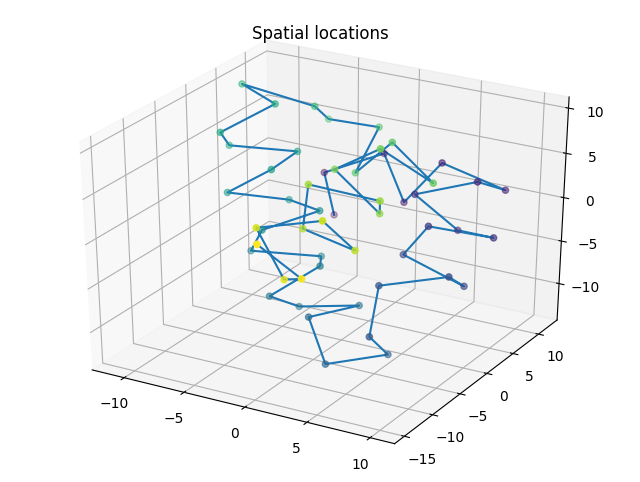

In [50]:
coordinates = protein.cb_coordinates[0]        # Coordinates of the β carbon (α if β is not present)

fig = plt.figure(figsize=(8, 6))
gs = plt.GridSpec(1, 1)
ax = fig.add_subplot(gs[0], projection='3d')
ax.plot(*coordinates.T);
ax.scatter(*coordinates.T, c=np.linspace(0,1,len(coordinates)));
ax.set_title('Spatial locations')

display(fig)

In [48]:
coordinates = protein.cb_coordinates[0]  
x, y, z = coordinates[:,0], coordinates[:,1], coordinates[:,2]

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   marker=dict(
                                            size=4,
                                            color='darkblue',
                                            opacity=0.7),
                                   line=dict(
                                        #color='darkblue',
                                        width=2))])

iplot(fig)